In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


In [61]:
df_can = pd.read_csv('breast_cancer.csv')
df_can.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [25]:
df_can.shape

(683, 10)

In [26]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [27]:
df_can.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [28]:
df_can['Clump Thickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9])

In [29]:
df_can['Clump Thickness'].value_counts()

Clump Thickness
1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: count, dtype: int64

In [30]:
df_can['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [31]:
df_can['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [32]:
df_can['Normal Nucleoli'].unique()

array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8])

In [33]:
df_can['Normal Nucleoli'].value_counts()

Normal Nucleoli
1     432
10     60
3      42
2      36
8      23
6      22
5      19
4      18
7      16
9      15
Name: count, dtype: int64

In [34]:
df_can.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [35]:
df_can.dtypes

Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [36]:
df_can.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [37]:
x = df_can.iloc[:, :-1].values
y = df_can.iloc[:, -1].values


<ipython-input-38-4138f13ec2ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_can['Clump Thickness'])


<Axes: title={'center': 'Clump Thickness'}, xlabel='Clump Thickness', ylabel='Density'>

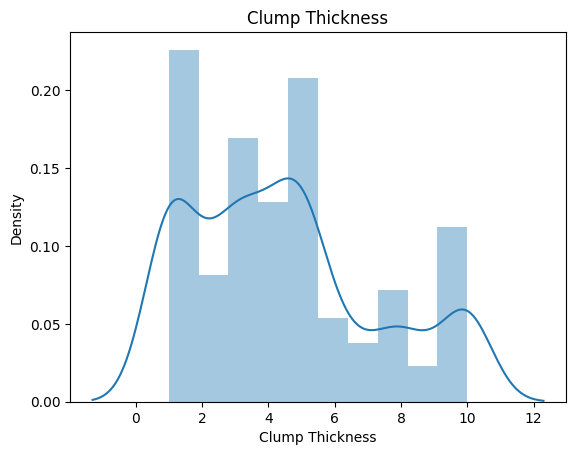

In [38]:
plt.title('Clump Thickness')
sns.distplot(df_can['Clump Thickness'])

<ipython-input-39-b90dfa53d72c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_can['Uniformity of Cell Size'])


<Axes: title={'center': 'Uniformity of Cell Size'}, xlabel='Uniformity of Cell Size', ylabel='Density'>

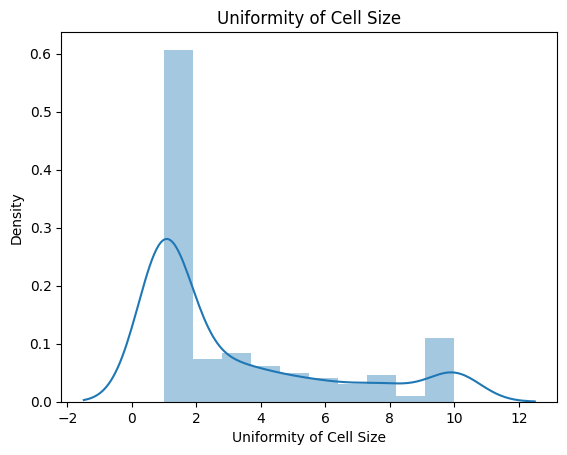

In [39]:
plt.title('Uniformity of Cell Size')
sns.distplot(df_can['Uniformity of Cell Size'])

In [54]:
x_train, x_test, y_train, y_test = train_test_split(df_can['Clump Thickness'], df_can['Uniformity of Cell Size'], test_size=0.2, random_state=0)

NameError: name 'y_pred_train' is not defined

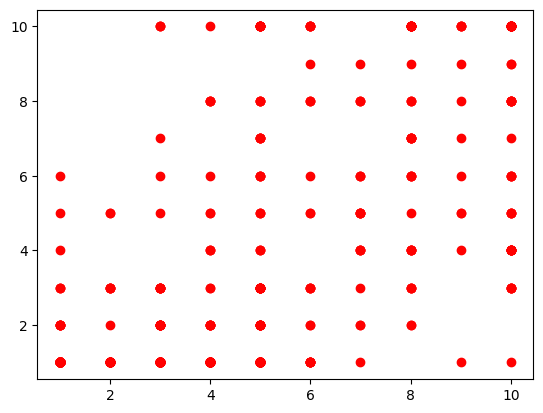

In [58]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, y_pred_train, color='blue')
plt.title('Clump Thickness vs Uniformity of Cell Size')
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.box(False)
plt.show()


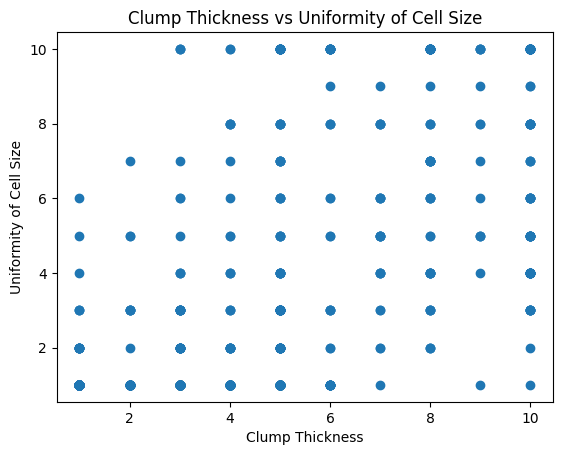

In [56]:
plt.scatter(df_can['Clump Thickness'], df_can['Uniformity of Cell Size'])
plt.title('Clump Thickness vs Uniformity of Cell Size')
plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of Cell Size')
plt.show()

In [57]:
x = df_can.drop('Class', axis=1)
y = df_can['Class']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [48]:
y_test_pred = logreg.predict(x_test)
y_test_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

In [49]:
accuracy_score(y_test, y_test_pred)

0.9562043795620438

In [50]:
y_train_pred = logreg.predict(x_train)
y_train_pred

array([4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2,

In [51]:
accuracy_score(y_train, y_train_pred)

0.9706959706959707

In [53]:
y_train

array([4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2,